<p style="font-family: Arial; font-size:3.75em;font-style:bold"><br>
Pandas</p><br>


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [2]:
import pandas as pd
import numpy as np

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. 

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>

In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*

* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*

* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [3]:
movies = pd.read_csv('movielens/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


movieId                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   
5         6                         Heat (1995)   
6         7                      Sabrina (1995)   
7         8                 Tom and Huck (1995)   
8         9                 Sudden Death (1995)   
9        10                    GoldenEye (1995)   
10       11      American President, The (1995)   
11       12  Dracula: Dead and Loving It (1995)   
12       13                        Balto (1995)   
13       14                        Nixon (1995)   
14       15             Cutthroat Island (1995)   

                                         genres  
0   Adventure|Animation|Children|Comedy|Fantasy  
1                    Adventure|Children|Fantasy  
2                                Comedy|Romance  
3                          Comedy|Drama|Romance  
4                                        Comedy  
5                         Action|Crime|Thriller  
6                                Comedy|Romance  
7                            Adventure|Children  
8                                        Action  
9                     Action|Adventure|Thriller  
10                         Comedy|Drama|Romance  
11                                Comedy|Horror  
12                 Adventure|Animation|Children  
13                                        Drama  
14                     Action|Adventure|Romance

In [4]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('movielens/tags.csv', sep=',')
tags.head()
tags = tags.set_index(['userId','movieId'])
tags.head()

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

tag   timestamp
userId movieId                           
18     4141       Mark Waters  1240597180
65     208          dark hero  1368150078
       353          dark hero  1368150079
       521      noir thriller  1368149983
       592          dark hero  1368150078

In [5]:
ratings = pd.read_csv('movielens/ratings.csv', sep=',') 
ratings.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [6]:
# For current analysis, we will remove timestamp

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [7]:
#Extract 0th row: notice that it is in fact a Series

row_0 = tags.iloc[0]
type(row_0)
row_0
column_0=tags.iloc[:,0:2]
column_0

pandas.core.series.Series

tag    Mark Waters
Name: (18, 4141), dtype: object

tag
userId movieId                                                   
18     4141                                           Mark Waters
65     208                                              dark hero
       353                                              dark hero
       521                                          noir thriller
       592                                              dark hero
       668                                              bollywood
       898                                       screwball comedy
       1248                                         noir thriller
       1391                                                  mars
       1617                                              neo-noir
       1694                                                 jesus
       1783                                         noir thriller
       2022                                                 jesus
       2193                                                dragon
       2353                                     conspiracy theory
       2662                                                  mars
       2726                                         noir thriller
       2840                                                 jesus
       3052                                                 jesus
       5135                                             bollywood
       6539                                              treasure
       6874                                             dark hero
       7013                                         noir thriller
       7318                                                 jesus
       8529                                              stranded
       8622                                     conspiracy theory
       27803                   Oscar (Best Foreign Language Film)
       27866                                          New Zealand
       48082                                              surreal
       48082                                              unusual
...                                                           ...
138436 81932                                             big hair
       81932                                        Mark Wahlberg
       81932                                                 pigs
       81932                                         prostitution
138437 77154    This movie should have been called "How Cocain...
138446 317                                              Christmas
       317                                                  funny
       317                                         Judge Reinhold
       317                                              Tim Allen
       317                                              whiny kid
       837                                        family friendly
       918                                        halloween scene
       918                                                 quirky
       2396                                         topless scene
       3086                                             Christmas
       3086                                               classic
       3086                                                 funny
       3086                                                 scary
       3489                                             Peter Pan
       3489                                            soundtrack
       3489                                    visually appealing
       7045                                       family friendly
       7045                      Scary Movies To See on Halloween
       7164                                             Peter Pan
       7164                                    visually appealing
       55999                                              dragged
       55999                                        Jason Bateman
       55999                                               quirky
       55999                        

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [8]:
tags.index

MultiIndex(levels=[[18, 65, 96, 121, 129, 133, 190, 205, 208, 271, 279, 316, 318, 320, 342, 348, 359, 370, 395, 409, 451, 460, 469, 471, 482, 489, 500, 505, 534, 540, 558, 570, 586, 619, 631, 662, 693, 694, 700, 707, 729, 739, 741, 768, 770, 786, 787, 819, 829, 858, 887, 888, 910, 964, 969, 971, 975, 1015, 1166, 1244, 1268, 1271, 1277, 1288, 1339, 1376, 1387, 1408, 1418, 1447, 1453, 1469, 1483, 1486, 1507, 1515, 1516, 1518, 1523, 1584, 1587, 1588, 1593, 1602, 1616, 1619, 1623, 1629, 1644, 1662, 1678, 1686, 1705, 1719, 1738, 1741, 1755, 1763, 1775, 1816, 1826, 1835, 1844, 1849, 1867, 1910, 1932, 1935, 1966, 2001, 2004, 2024, 2041, 2051, 2062, 2081, 2107, 2108, 2120, 2160, 2188, 2193, 2197, 2217, 2228, 2232, 2248, 2269, 2270, 2274, 2276, 2295, 2298, 2299, 2316, 2335, 2352, 2367, 2423, 2465, 2467, 2470, 2474, 2483, 2492, 2503, 2515, 2526, 2559, 2607, 2611, 2650, 2661, 2669, 2683, 2702, 2713, 2721, 2742, 2750, 2751, 2771, 2834, 2847, 2855, 2908, 2930, 2931, 2945, 2973, 2988, 3029, 3031, 30

In [9]:
tags.columns

Index(['tag'], dtype='object')

In [10]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

tag
userId movieId                   
18     4141           Mark Waters
65     1783         noir thriller
910    68554    conspiracy theory

<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [11]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [12]:
ratings.describe()

userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00

In [13]:
ratings['rating'].mean()

3.5255285642993797

In [14]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [15]:
ratings['rating'].min()

0.5

In [16]:
ratings['rating'].max()

5.0

In [17]:
ratings['rating'].std()

1.0519889192942424

In [18]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [19]:
ratings.corr()

userId   movieId    rating
userId   1.000000 -0.000850  0.001175
movieId -0.000850  1.000000  0.002606
rating   0.001175  0.002606  1.000000

In [20]:
filter_1 = ratings['rating'] > 5
print(filter_1)
type(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
20000233    False
20000234    False
20000235    False
20000236    False
20000237    False
20000238    False
20000239    False
20000240    False
20000241    False
20000242    False
20000243    False
20000244    False
20000245    False
20000246    False
20000247    False
20000248    False
20000249    False
20000250    False
20000251    False
20000252    False
20000253    False
20000254    False
20000255    False
20000256    False
20000257  

pandas.core.series.Series

False

In [21]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [22]:
movies.shape

(27278, 3)

In [23]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [24]:
ratings.shape

(20000263, 3)

In [25]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [26]:
tags.shape

(465564, 1)

In [27]:
#is any row NULL ?

tags.isnull().any()

tag    True
dtype: bool

We have some tags which are NULL.

In [28]:
tags = tags.dropna()

In [29]:
#Check again: is any row NULL ?

tags.isnull().any()

tag    False
dtype: bool

In [30]:
tags.shape

(465548, 1)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [31]:
tags['tag'].head()

userId  movieId
18      4141         Mark Waters
65      208            dark hero
        353            dark hero
        521        noir thriller
        592            dark hero
Name: tag, dtype: object

In [32]:
movies[['title','genres']].head()

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [33]:
ratings[-10:]

userId  movieId  rating
20000253  138493    60816     4.5
20000254  138493    61160     4.0
20000255  138493    65682     4.5
20000256  138493    66762     4.5
20000257  138493    68319     4.5
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5

In [34]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]
tag_counts[-10:]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

quirky comedy                                                                   1
steve coogan                                                                    1
pre-war                                                                         1
baltimore                                                                       1
Atwood ending                                                                   1
Brilliant acting by all!  Sean Bean was amazing even though he hardly spoke.    1
Jake Schreier                                                                   1
Carles Bosch                                                                    1
John Alexander                                                                  1
youth rebellion                                                                 1
Name: tag, dtype: int64

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [35]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

userId  movieId  rating
68        1     2021     4.0
69        1     2100     4.0
70        1     2118     4.0
71        1     2138     4.0
72        1     2140     4.0
73        1     2143     4.0
74        1     2173     4.0
75        1     2174     4.0
76        1     2193     4.0
79        1     2288     4.0
80        1     2291     4.0
81        1     2542     4.0
82        1     2628     4.0
90        1     2762     4.0
92        1     2872     4.0
94        1     2944     4.0
96        1     2959     4.0
97        1     2968     4.0
101       1     3081     4.0
102       1     3153     4.0

In [36]:
is_animation = movies['genres'].str.contains('Animation')

#movies[is_animation][5:15]
movies[is_animation].head(15)

movieId                                       title  \
0          1                            Toy Story (1995)   
12        13                                Balto (1995)   
47        48                           Pocahontas (1995)   
236      239                       Goofy Movie, A (1995)   
241      244                     Gumby: The Movie (1995)   
310      313                   Swan Princess, The (1994)   
360      364                       Lion King, The (1994)   
388      392  Secret Adventures of Tom Thumb, The (1993)   
547      551      Nightmare Before Christmas, The (1993)   
553      558                      Pagemaster, The (1994)   
582      588                              Aladdin (1992)   
588      594      Snow White and the Seven Dwarfs (1937)   
589      595                 Beauty and the Beast (1991)   
590      596                            Pinocchio (1940)   
604      610                          Heavy Metal (1981)   

                                              genres  
0        Adventure|Animation|Children|Comedy|Fantasy  
12                      Adventure|Animation|Children  
47          Animation|Children|Drama|Musical|Romance  
236                Animation|Children|Comedy|Romance  
241                               Animation|Children  
310                               Animation|Children  
360  Adventure|Animation|Children|Drama|Musical|IMAX  
388                              Adventure|Animation  
547               Animation|Children|Fantasy|Musical  
553      Action|Adventure|Animation|Children|Fantasy  
582      Adventure|Animation|Children|Comedy|Musical  
588         Animation|Children|Drama|Fantasy|Musical  
589  Animation|Children|Fantasy|Musical|Romance|IMAX  
590               Animation|Children|Fantasy|Musical  
604         Action|Adventure|Animation|Horror|Sci-Fi

<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [37]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

movieId
rating         
0.5      239125
1.0      680732
1.5      279252
2.0     1430997
2.5      883398
3.0     4291193
3.5     2200156
4.0     5561926
4.5     1534824
5.0     2898660

In [38]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

rating
movieId          
1        3.921240
2        3.211977
3        3.151040
4        2.861393
5        3.064592

In [39]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

movie_count.tail()

rating
movieId        
1         49695
2         22243
3         12735
4          2756
5         12161

rating
movieId        
131254        1
131256        1
131258        1
131260        1
131262        1

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [40]:
tags.head()

tag
userId movieId               
18     4141       Mark Waters
65     208          dark hero
       353          dark hero
       521      noir thriller
       592          dark hero

In [41]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [42]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

                                      tag  
0                                 Watched  
1                      computer animation  
2                 Disney animated feature  
3                         Pixar animation  
4  TÃ©a Leoni does not star in this movie

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [43]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

movieId    rating
0        1  3.921240
1        2  3.211977
2        3  3.151040
3        4  2.861393
4        5  3.064592

In [44]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

movieId                          title                    genres  \
26739   131254   Kein Bund für's Leben (2007)                    Comedy   
26740   131256  Feuer, Eis & Dosenbier (2002)                    Comedy   
26741   131258             The Pirates (2014)                 Adventure   
26742   131260            Rentun Ruusu (2001)        (no genres listed)   
26743   131262               Innocence (2014)  Adventure|Fantasy|Horror   

       rating  
26739     4.0  
26740     4.0  
26741     2.5  
26742     3.0  
26743     4.0

In [45]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

movieId                                              title  \
26737   131250                              No More School (2000)   
26738   131252  Forklift Driver Klaus: The First Day on the Jo...   
26739   131254                       Kein Bund für's Leben (2007)   
26740   131256                      Feuer, Eis & Dosenbier (2002)   
26743   131262                                   Innocence (2014)   

                         genres  rating  
26737                    Comedy     4.0  
26738             Comedy|Horror     4.0  
26739                    Comedy     4.0  
26740                    Comedy     4.0  
26743  Adventure|Fantasy|Horror     4.0

In [46]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

movieId                               title  \
0        1                    Toy Story (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
6        7                      Sabrina (1995)   

                                        genres    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  3.921240  
2                               Comedy|Romance  3.151040  
3                         Comedy|Drama|Romance  2.861393  
4                                       Comedy  3.064592  
6                               Comedy|Romance  3.366484

In [47]:
box_office[is_comedy & is_highly_rated][-5:]

movieId                                              title  \
26736   131248                              Brother Bear 2 (2006)   
26737   131250                              No More School (2000)   
26738   131252  Forklift Driver Klaus: The First Day on the Jo...   
26739   131254                       Kein Bund für's Leben (2007)   
26740   131256                      Feuer, Eis & Dosenbier (2002)   

                                            genres  rating  
26736  Adventure|Animation|Children|Comedy|Fantasy     4.0  
26737                                       Comedy     4.0  
26738                                Comedy|Horror     4.0  
26739                                       Comedy     4.0  
26740                                       Comedy     4.0

<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [48]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [49]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [50]:
movie_genres[:10]

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   
5     Action      Crime  Thriller    None     None  None  None  None  None   
6     Comedy    Romance      None    None     None  None  None  None  None   
7  Adventure   Children      None    None     None  None  None  None  None   
8     Action       None      None    None     None  None  None  None  None   
9     Action  Adventure  Thriller    None     None  None  None  None  None   

      9  
0  None  
1  None  
2  None  
3  None  
4  None  
5  None  
6  None  
7  None  
8  None  
9  None

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [51]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [52]:
movie_genres[:10]

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   
5     Action      Crime  Thriller    None     None  None  None  None  None   
6     Comedy    Romance      None    None     None  None  None  None  None   
7  Adventure   Children      None    None     None  None  None  None  None   
8     Action       None      None    None     None  None  None  None  None   
9     Action  Adventure  Thriller    None     None  None  None  None  None   

      9  isComedy  
0  None      True  
1  None     False  
2  None      True  
3  None      True  
4  None      True  
5  None     False  
6  None      True  
7  None     False  
8  None     False  
9  None     False

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [53]:
movies['year'] = movies['title'].str.extract('.*\((\d+)\).*', expand=True)
movies.tail()

movieId                          title                    genres  year
27273   131254   Kein Bund für's Leben (2007)                    Comedy  2007
27274   131256  Feuer, Eis & Dosenbier (2002)                    Comedy  2002
27275   131258             The Pirates (2014)                 Adventure  2014
27276   131260            Rentun Ruusu (2001)        (no genres listed)  2001
27277   131262               Innocence (2014)  Adventure|Fantasy|Horror  2014

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [54]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [55]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [56]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags.head(5)

userId  movieId            tag   timestamp         parsed_time
0      18     4141    Mark Waters  1240597180 2009-04-24 18:19:40
1      65      208      dark hero  1368150078 2013-05-10 01:41:18
2      65      353      dark hero  1368150079 2013-05-10 01:41:19
3      65      521  noir thriller  1368149983 2013-05-10 01:39:43
4      65      592      dark hero  1368150078 2013-05-10 01:41:18

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [57]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [58]:
selected_rows[:10]

userId  movieId              tag   timestamp         parsed_time
301     318      260            1970s  1424472169 2015-02-20 22:42:49
302     318      260          fantasy  1424472169 2015-02-20 22:42:49
303     318      260           sci-fi  1424472169 2015-02-20 22:42:49
304     318   115149           Action  1424534310 2015-02-21 15:58:30
305     318   115149          Revenge  1424534283 2015-02-21 15:58:03
306     318   115149     Willem Dafoe  1424534383 2015-02-21 15:59:43
324     342      318       masterplan  1423424898 2015-02-08 19:48:18
326     342      318    prison escape  1423424898 2015-02-08 19:48:18
327     342      318       redemption  1423424898 2015-02-08 19:48:18
589     342   108190  based on a book  1426978115 2015-03-21 22:48:35

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [59]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

userId  movieId              tag   timestamp         parsed_time
333932  100371     2788     monty python  1135429210 2005-12-24 13:00:10
333927  100371     1732    coen brothers  1135429236 2005-12-24 13:00:36
333924  100371     1206  stanley kubrick  1135429248 2005-12-24 13:00:48
333923  100371     1193   jack nicholson  1135429371 2005-12-24 13:02:51
333939  100371     5004    peter sellers  1135429399 2005-12-24 13:03:19
333922  100371       47   morgan freeman  1135429412 2005-12-24 13:03:32
333921  100371       47        brad pitt  1135429412 2005-12-24 13:03:32
333936  100371     4011        brad pitt  1135429431 2005-12-24 13:03:51
333937  100371     4011      guy ritchie  1135429431 2005-12-24 13:03:51
333920  100371       32     bruce willis  1135429442 2005-12-24 13:04:02

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>

## Are Movie ratings related to the year of launch?

In [60]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

movieId  rating
26739   131254     4.0
26740   131256     4.0
26741   131258     2.5
26742   131260     3.0
26743   131262     4.0

In [61]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  3.921240  
1                   Adventure|Children|Fantasy  1995  3.211977  
2                               Comedy|Romance  1995  3.151040  
3                         Comedy|Drama|Romance  1995  2.861393  
4                                       Comedy  1995  3.064592

movieId    rating
movieId  1.000000 -0.090369
rating  -0.090369  1.000000

In [62]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

year    rating
0  1891  3.000000
1  1893  3.375000
2  1894  3.071429
3  1895  3.125000
4  1896  3.183036
5  1898  3.850000
6  1899  3.625000
7  1900  3.166667
8  1901  5.000000
9  1902  3.738189

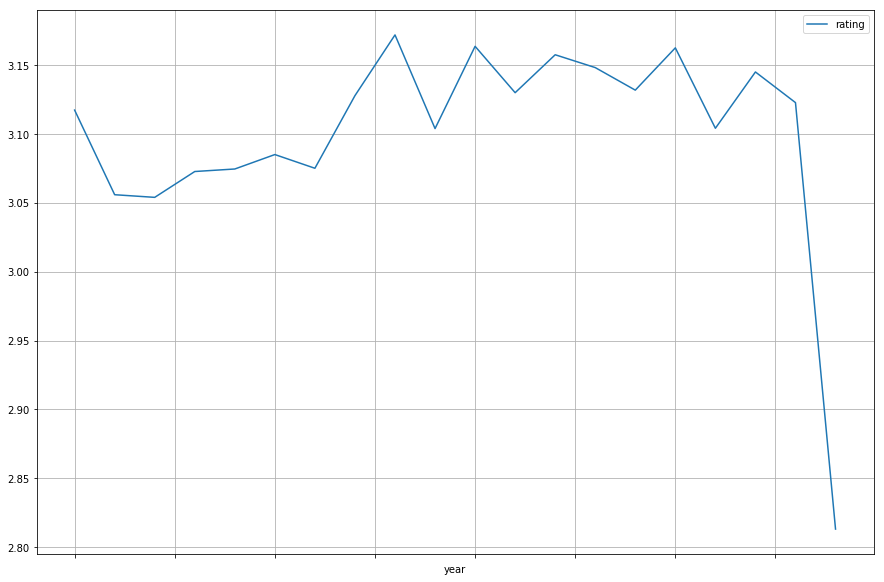

In [63]:
%matplotlib inline

yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)